# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}"

city_info = []
record_count = 0
set_count = 1

print("Beginning Data Retrieval")

for city in cities:
    set_count += 1
    city_url = query_url + "&q=" + city
    record_count += 1
    print("Processing Record %s | %s" % (record_count, city))
    
    try:
        city_weather = requests.get(city_url).json()
        city_clouds = city_weather["clouds"]["all"]
        city_country = city_weather["sys"]["country"]      
        city_date = city_weather["dt"]      
        city_humidity = city_weather["main"]["humidity"]      
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_wind = city_weather["wind"]["speed"]
        
        city_info.append({"City": city,"Lat": city_lat,"Lng": city_lng,"Max Temp": city_max_temp, "Humidity": city_humidity,
                          "Cloudiness": city_clouds,"Wind Speed": city_wind,"Country": city_country,"Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
               
print("-------------------------")
print("Data Retrieval Complete ")
print("-------------------------")

Beginning Data Retrieval
Processing Record 1 | narsaq
Processing Record 2 | angoram
Processing Record 3 | asau
City not found. Skipping...
Processing Record 4 | boca do acre
Processing Record 5 | ust-kuyga
Processing Record 6 | coquimbo
Processing Record 7 | busselton
Processing Record 8 | barabinsk
Processing Record 9 | palmer
Processing Record 10 | hobart
Processing Record 11 | lorengau
Processing Record 12 | kahului
Processing Record 13 | carnarvon
Processing Record 14 | shizuishan
Processing Record 15 | hithadhoo
Processing Record 16 | vanavara
Processing Record 17 | vaini
Processing Record 18 | taolanaro
City not found. Skipping...
Processing Record 19 | cape town
Processing Record 20 | severo-kurilsk
Processing Record 21 | saskylakh
Processing Record 22 | mataura
Processing Record 23 | hamilton
Processing Record 24 | arlit
Processing Record 25 | bluff
Processing Record 26 | hami
Processing Record 27 | anadyr
Processing Record 28 | hasaki
Processing Record 29 | georgetown
Processi

Processing Record 230 | glendive
Processing Record 231 | kruisfontein
Processing Record 232 | mys shmidta
City not found. Skipping...
Processing Record 233 | emmett
Processing Record 234 | kapaa
Processing Record 235 | belushya guba
City not found. Skipping...
Processing Record 236 | araouane
Processing Record 237 | elbistan
Processing Record 238 | ostersund
Processing Record 239 | ayutla
Processing Record 240 | hearst
Processing Record 241 | talara
Processing Record 242 | jeremie
Processing Record 243 | humaita
Processing Record 244 | maple creek
Processing Record 245 | port lincoln
Processing Record 246 | sao pedro do sul
Processing Record 247 | bandarbeyla
Processing Record 248 | birao
Processing Record 249 | beloomut
Processing Record 250 | goryachegorsk
Processing Record 251 | westport
Processing Record 252 | khatanga
Processing Record 253 | pierre
Processing Record 254 | severnyy
City not found. Skipping...
Processing Record 255 | laguna
Processing Record 256 | kupang
Processing 

Processing Record 458 | meulaboh
Processing Record 459 | peterhead
Processing Record 460 | grand gaube
Processing Record 461 | champerico
Processing Record 462 | kiruna
Processing Record 463 | maceio
Processing Record 464 | homer
Processing Record 465 | ahar
Processing Record 466 | sivaki
Processing Record 467 | wanning
Processing Record 468 | malartic
Processing Record 469 | sechura
Processing Record 470 | meyungs
City not found. Skipping...
Processing Record 471 | tucuman
Processing Record 472 | flinders
Processing Record 473 | ahuimanu
Processing Record 474 | macheng
Processing Record 475 | sainte-marie
Processing Record 476 | kilakarai
City not found. Skipping...
Processing Record 477 | chapleau
Processing Record 478 | miajadas
Processing Record 479 | coihaique
Processing Record 480 | kimry
Processing Record 481 | greensburg
Processing Record 482 | tumannyy
City not found. Skipping...
Processing Record 483 | batagay-alyta
Processing Record 484 | vakhrushev
Processing Record 485 | p

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_info_df = pd.DataFrame(city_info)

cloudiness = city_info_df["Cloudiness"]
humidity = city_info_df["Humidity"]
lat = city_info_df["Lat"]
lng = city_info_df["Lng"]
max_temp = city_info_df["Max Temp"]
wind_speed = city_info_df["Wind Speed"]

city_info_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [8]:
city_info_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,narsaq,9,GL,1570674748,69,60.91,-46.05,275.15,2.401
1,angoram,100,PG,1570674748,77,-4.06,144.07,302.61,1.640
2,boca do acre,100,BR,1570674748,88,-8.76,-67.39,295.83,0.573
3,ust-kuyga,99,RU,1570674748,91,70.00,135.55,258.18,2.540
4,coquimbo,75,CL,1570674618,87,-29.95,-71.34,290.37,2.100


In [9]:
city_info_df.to_csv(r'WeatherPyExport.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

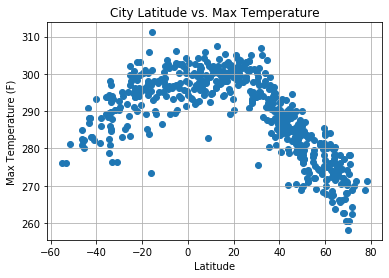

In [10]:
plt.scatter(lat,max_temp,label="Cities")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("fig1.png")

#### Latitude vs. Humidity Plot

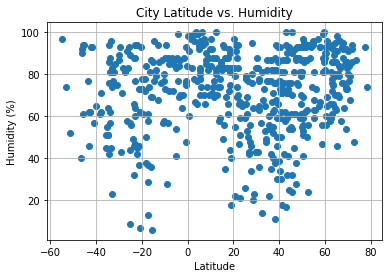

In [11]:
plt.scatter(lat,humidity,label="Cities")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("fig2.png")

#### Latitude vs. Cloudiness Plot

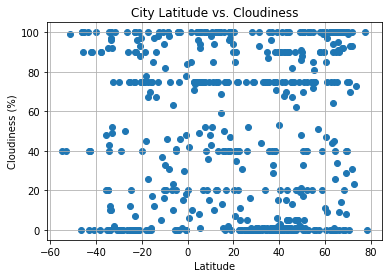

In [12]:
plt.scatter(lat,cloudiness,label="Cities")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("fig3.png")

#### Latitude vs. Wind Speed Plot

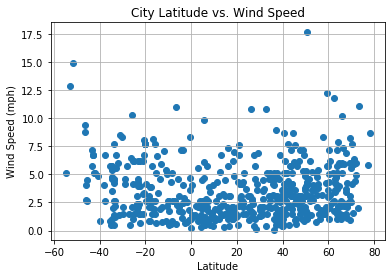

In [13]:
plt.scatter(lat,wind_speed,label="Cities")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("fig4.png")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [18]:
# Create Northern and Southern Hemisphere DataFrames
NorthernHemisphere = city_info_df.loc[(city_info_df["Lat"]>0)]
SouthernHemisphere = city_info_df.loc[(city_info_df["Lat"]<0)]

N_cloudiness = NorthernHemisphere["Cloudiness"]
N_humidity = NorthernHemisphere["Humidity"]
N_lat = NorthernHemisphere["Lat"]
N_lng = NorthernHemisphere["Lng"]
N_max_temp = NorthernHemisphere["Max Temp"]
N_wind_speed = NorthernHemisphere["Wind Speed"]

S_cloudiness = SouthernHemisphere["Cloudiness"]
S_humidity = SouthernHemisphere["Humidity"]
S_lat = SouthernHemisphere["Lat"]
S_lng = SouthernHemisphere["Lng"]
S_max_temp = SouthernHemisphere["Max Temp"]
S_wind_speed = SouthernHemisphere["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.8684944513663149


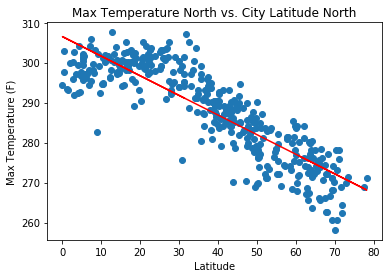

Linear Equation y=-0.49x+306.55


In [84]:
NTslope, NTintercept, NTr_value, NTp_value, NTstd_err = st.linregress(N_lat,N_max_temp)
NTcorrelation = st.pearsonr(N_lat,N_max_temp)
print("r-squared:", NTcorrelation[0])

plt.scatter(N_lat,N_max_temp)
plt.title("Max Temperature North vs. City Latitude North")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.plot(N_lat, NTintercept + NTslope*N_lat, 'r')
plt.show()

print("Linear Equation y="+str(round(NTslope, 2))+"x+"+str(round(NTintercept, 2)))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.645701508498153


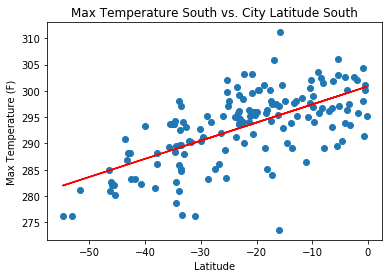

Linear Equation y=0.34x+300.87


In [85]:
STslope, STintercept, STr_value, STp_value, STstd_err = st.linregress(S_lat,S_max_temp)
STcorrelation = st.pearsonr(S_lat,S_max_temp)
print("r-squared:", STcorrelation[0])

plt.scatter(S_lat,S_max_temp)
plt.title("Max Temperature South vs. City Latitude South")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.plot(S_lat, STintercept + STslope*S_lat, 'r')
plt.show()

print("Linear Equation y="+str(round(STslope, 2))+"x+"+str(round(STintercept, 2)))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: -0.0019781405324947247


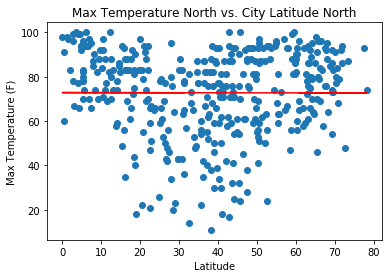

Linear Equation y=-0.0019x+72.83


In [86]:
NHslope, NHintercept, NHr_value, NHp_value, NHstd_err = st.linregress(N_lat,N_humidity)
NHcorrelation = st.pearsonr(N_lat,N_humidity)
print("r-squared:", NHcorrelation[0])

plt.scatter(N_lat,N_humidity)
plt.title("Humidity North vs. City Latitude North")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.plot(N_lat, NHintercept + NHslope*N_lat, 'r')
plt.show()

print("Linear Equation y="+str(round(NHslope, 4))+"x+"+str(round(NHintercept, 2)))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.0603708587213174


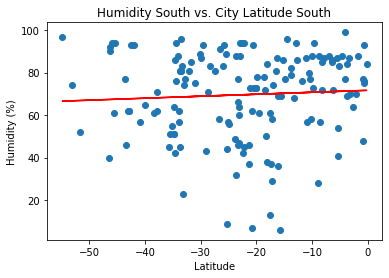

Linear Equation y=0.09x+71.68


In [88]:
SHslope, SHintercept, SHr_value, SHp_value, SHstd_err = st.linregress(S_lat,S_humidity)
SHcorrelation = st.pearsonr(S_lat,S_humidity)
print("r-squared:", SHcorrelation[0])

plt.scatter(S_lat,S_humidity)
plt.title("Humidity South vs. City Latitude South")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.plot(S_lat, SHintercept + SHslope*S_lat, 'r')
plt.show()

print("Linear Equation y="+str(round(SHslope, 2))+"x+"+str(round(SHintercept, 2)))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.018857817273389664


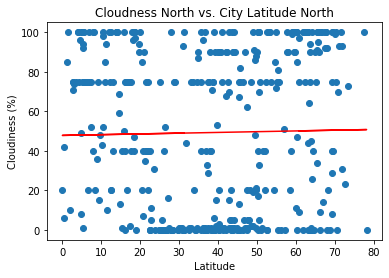

Linear Equation y=0.04x+47.81


In [90]:
NCslope, NCintercept, NCr_value, NCp_value, NCstd_err = st.linregress(N_lat,N_cloudiness)
NCcorrelation = st.pearsonr(N_lat,N_cloudiness)
print("r-squared:", NCcorrelation[0])

plt.scatter(N_lat,N_cloudiness)
plt.title("Cloudness North vs. City Latitude North")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.plot(N_lat, NCintercept + NCslope*N_lat, 'r')
plt.show()

print("Linear Equation y="+str(round(NCslope, 2))+"x+"+str(round(NCintercept, 2)))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: -0.06581377919533433


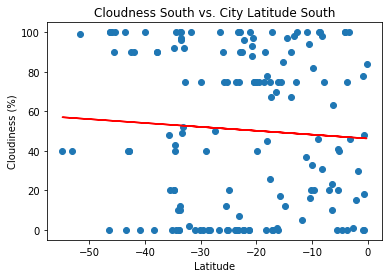

Linear Equation y=-0.2x+46.25


In [91]:
SCslope, SCintercept, SCr_value, SCp_value, SCstd_err = st.linregress(S_lat,S_cloudiness)
SCcorrelation = st.pearsonr(S_lat,S_cloudiness)
print("r-squared:", SCcorrelation[0])

plt.scatter(S_lat,S_cloudiness)
plt.title("Cloudness South vs. City Latitude South")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.plot(S_lat, SCintercept + SCslope*S_lat, 'r')
plt.show()

print("Linear Equation y="+str(round(SCslope, 2))+"x+"+str(round(SCintercept, 2)))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


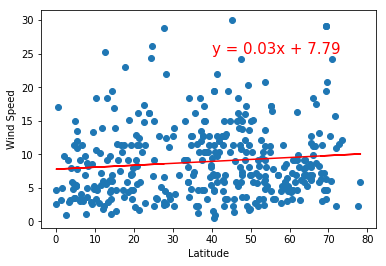

In [117]:
NWslope, NWintercept, NWr_value, NWp_value, NWstd_err = st.linregress(N_lat,N_wind_speed)
NWcorrelation = st.pearsonr(N_lat,N_wind_speed)
print("r-squared is:", NWcorrelation[0])

plt.scatter(N_lat,N_wind_speed)
plt.title("Wind Speed North vs. City Latitude North")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.plot(N_lat, NWintercept + NWslope*N_lat, 'r')
plt.show()

print("Linear Equation y="+str(round(NWslope, 2))+"x+"+str(round(NWintercept, 2)))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


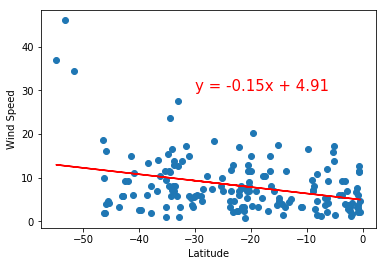

In [116]:
SWslope, SWintercept, SWr_value, SWp_value, SWstd_err = st.linregress(S_lat,S_wind_speed)
SWcorrelation = st.pearsonr(S_lat,S_wind_speed)
print("r-squared is:", SWcorrelation[0])

plt.scatter(S_lat,S_wind_speed)
plt.title("Wind Speed South vs. City Latitude South")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.plot(S_lat, SWintercept + SWslope*N_lat, 'r')
plt.show()

print("Linear Equation y="+str(round(SWslope, 2))+"x+"+str(round(SWintercept, 2)))